# Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 


# Problem Statement
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

 

In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

 

The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

 

# Business problem overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

 

# Understanding and defining fraud
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, the other ways are as follows:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing
 

# Data dictionary
The data set can be downloaded using this link.

 

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

 

# Project pipeline
The project pipeline can be briefly summarised in the following four steps:

# Data Understanding: 

Here, we need to load the data and understand the features present in it. This would help us choose the features that we will need for our final model.

- **Exploratory data analytics (EDA)**: Normally, in this step, we need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, we do not need to perform Z-scaling. However, we  can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
- **Train/Test split**: Now, we are familiar with the train/test split that we can perform to check the performance of our models with unseen data. Here, for validation, we can use the k-fold cross-validation method. We need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
- **Model building / hyperparameter tuning**: This is the final step at which we can try different models and fine-tune their hyperparameters until we get the desired level of performance on the given data set. We should try and check if we get a better model by various sampling techniques.
- **Model evaluation**: Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [6]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## since there is no null values hence it has made the further analysis easier .


In [12]:
print("Fraud")
print(df.Time[df.Class==1].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [13]:
print("Not Fraud")
print(df.Time[df.Class==0].describe())

Not Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [14]:
# get the distribution of fruad and legit transaction in the dataset

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
# get the percentage of fruad and legit transaction in the dataset

df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [16]:
credit_card = df.copy()

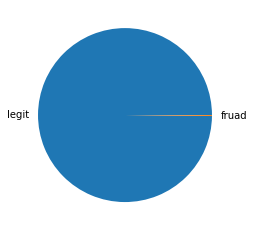

In [17]:
# pie chart of credit card transaction¶
credit_card
1
y=credit_card['Class'].value_counts(normalize=True)
2
mylabels = ["legit","fruad"]
3
plt.pie(y, labels = mylabels)
4
plt.show()

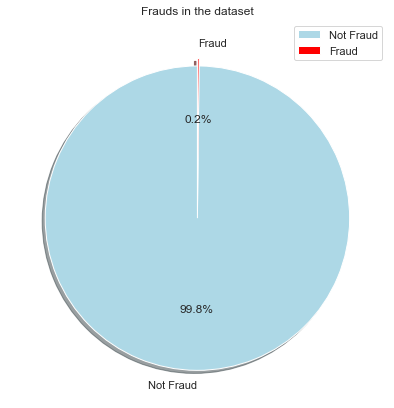

In [18]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = credit_card['Class'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

### It seems our dataset is highly imbalance. I'll take care of it later


## Taking 10% of the dataset to calculate the scatter plot

In [19]:
credit_card=credit_card.sample(frac=0.1)


In [20]:
credit_card['Class'].value_counts()

0    28443
1       38
Name: Class, dtype: int64

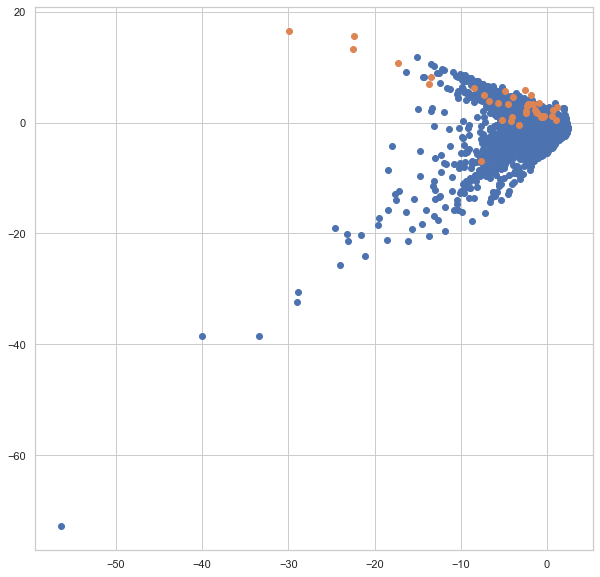

In [21]:
data = pd.DataFrame({"X Value": credit_card['V1'], "Y Value":credit_card['V2'], "Category": credit_card['Class']})
groups = data.groupby("Category")
plt.figure(figsize=(10, 10))
for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)

In [22]:
df.shape,credit_card.shape

((284807, 31), (28481, 31))

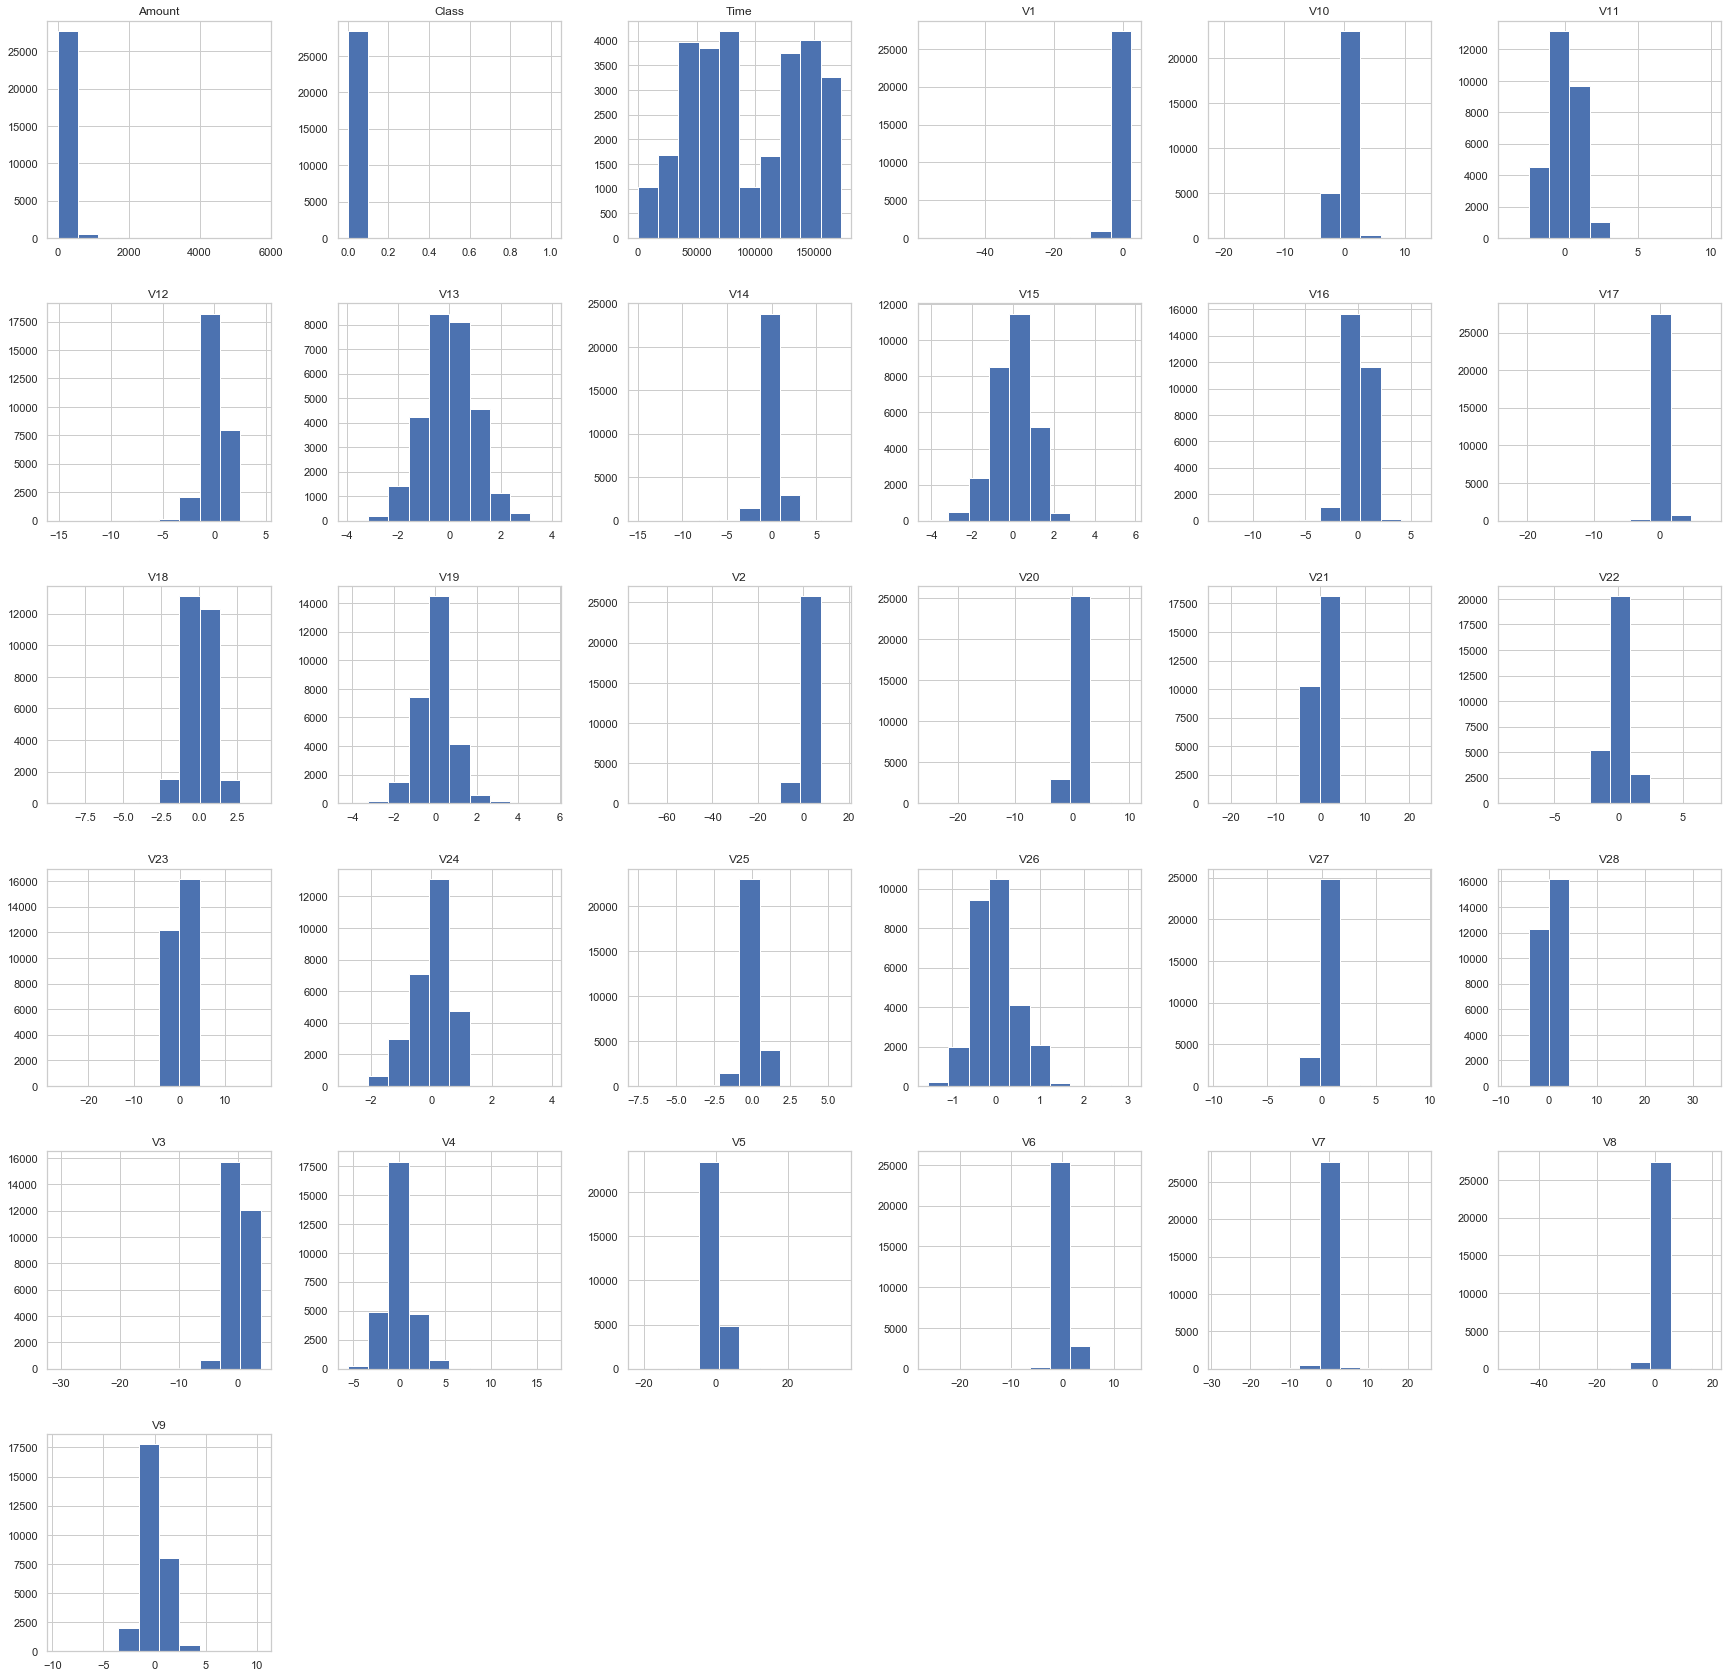

In [23]:
# plot histogram of each parameter
credit_card.hist(figsize=(30,30))
plt.show()

In [24]:
# determine number of fruad cases in dataset

Fruad=credit_card[credit_card['Class']==1]

Valid=credit_card[credit_card['Class']==0]

outlier_fraction=len(Fruad)/float(len(Valid))
print(outlier_fraction)
print('Fruad Cases: {}'.format(len(Fruad)))
print('Valid Cases: {}'.format(len(Valid)))

0.0013360053440213762
Fruad Cases: 38
Valid Cases: 28443


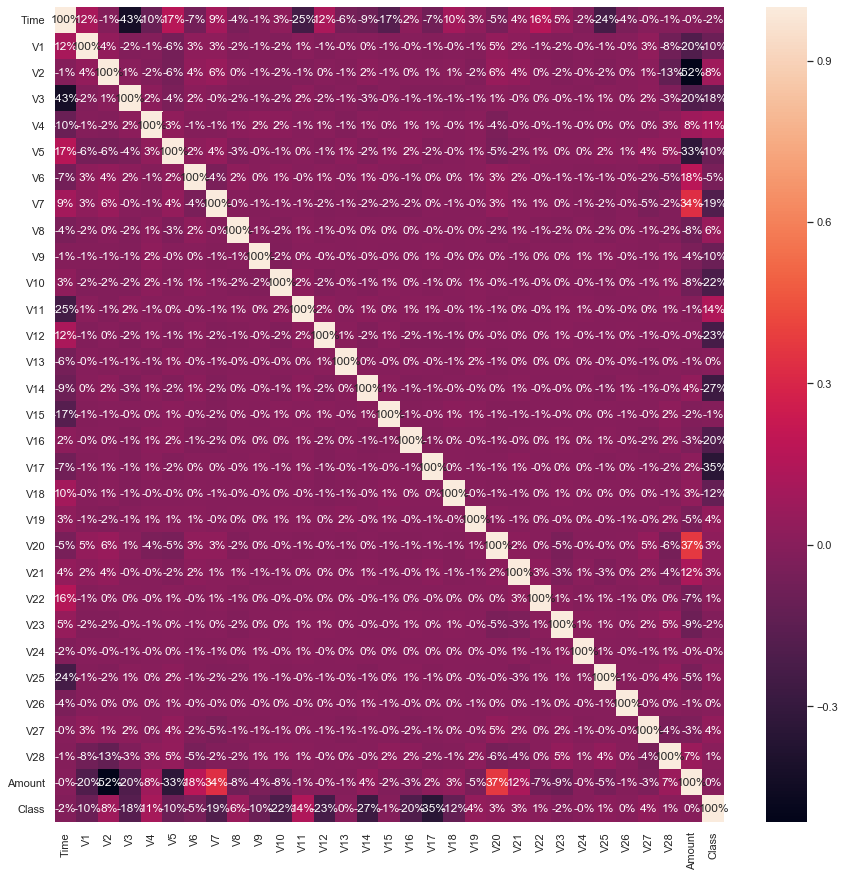

In [25]:
# correlation matrics
# heatmap of correlation matrix


df_corr = credit_card.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,fmt='.0%')

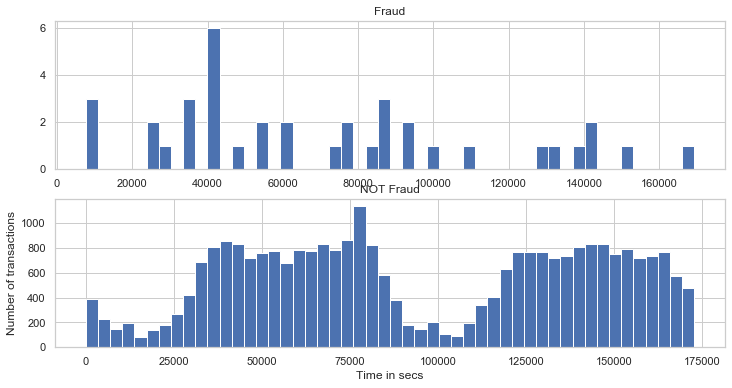

In [26]:


f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
ax1.hist(credit_card.Time[credit_card.Class==1],bins=50)
ax1.set_title("Fraud")
ax2.hist(credit_card.Time[credit_card.Class==0],bins=50)
ax2.set_title("NOT Fraud")
plt.xlabel('Time in secs')
plt.ylabel('Number of transactions')
plt.show()

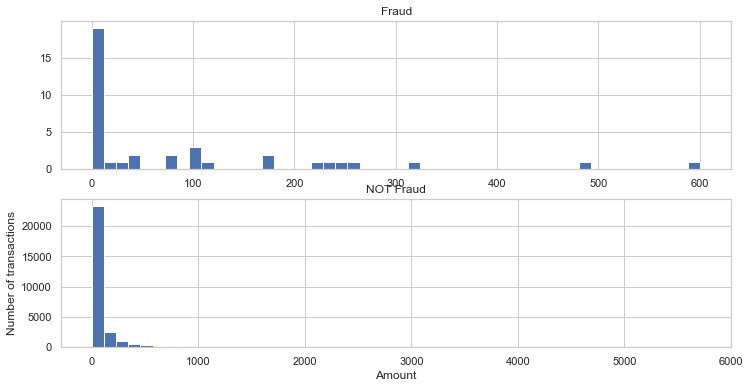

In [27]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
ax1.hist(credit_card.Amount[credit_card.Class==1],bins=50)
ax1.set_title("Fraud")
ax2.hist(credit_card.Amount[credit_card.Class==0],bins=50)
ax2.set_title("NOT Fraud")
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.show()

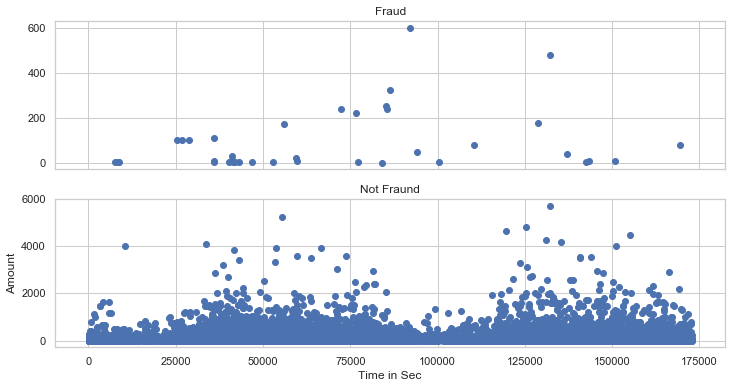

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(credit_card.Time[credit_card.Class == 1], credit_card.Amount[credit_card.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(credit_card.Time[credit_card.Class == 0], credit_card.Amount[credit_card.Class == 0])
ax2.set_title('Not Fraund')

plt.xlabel('Time in Sec')
plt.ylabel('Amount')
plt.show()

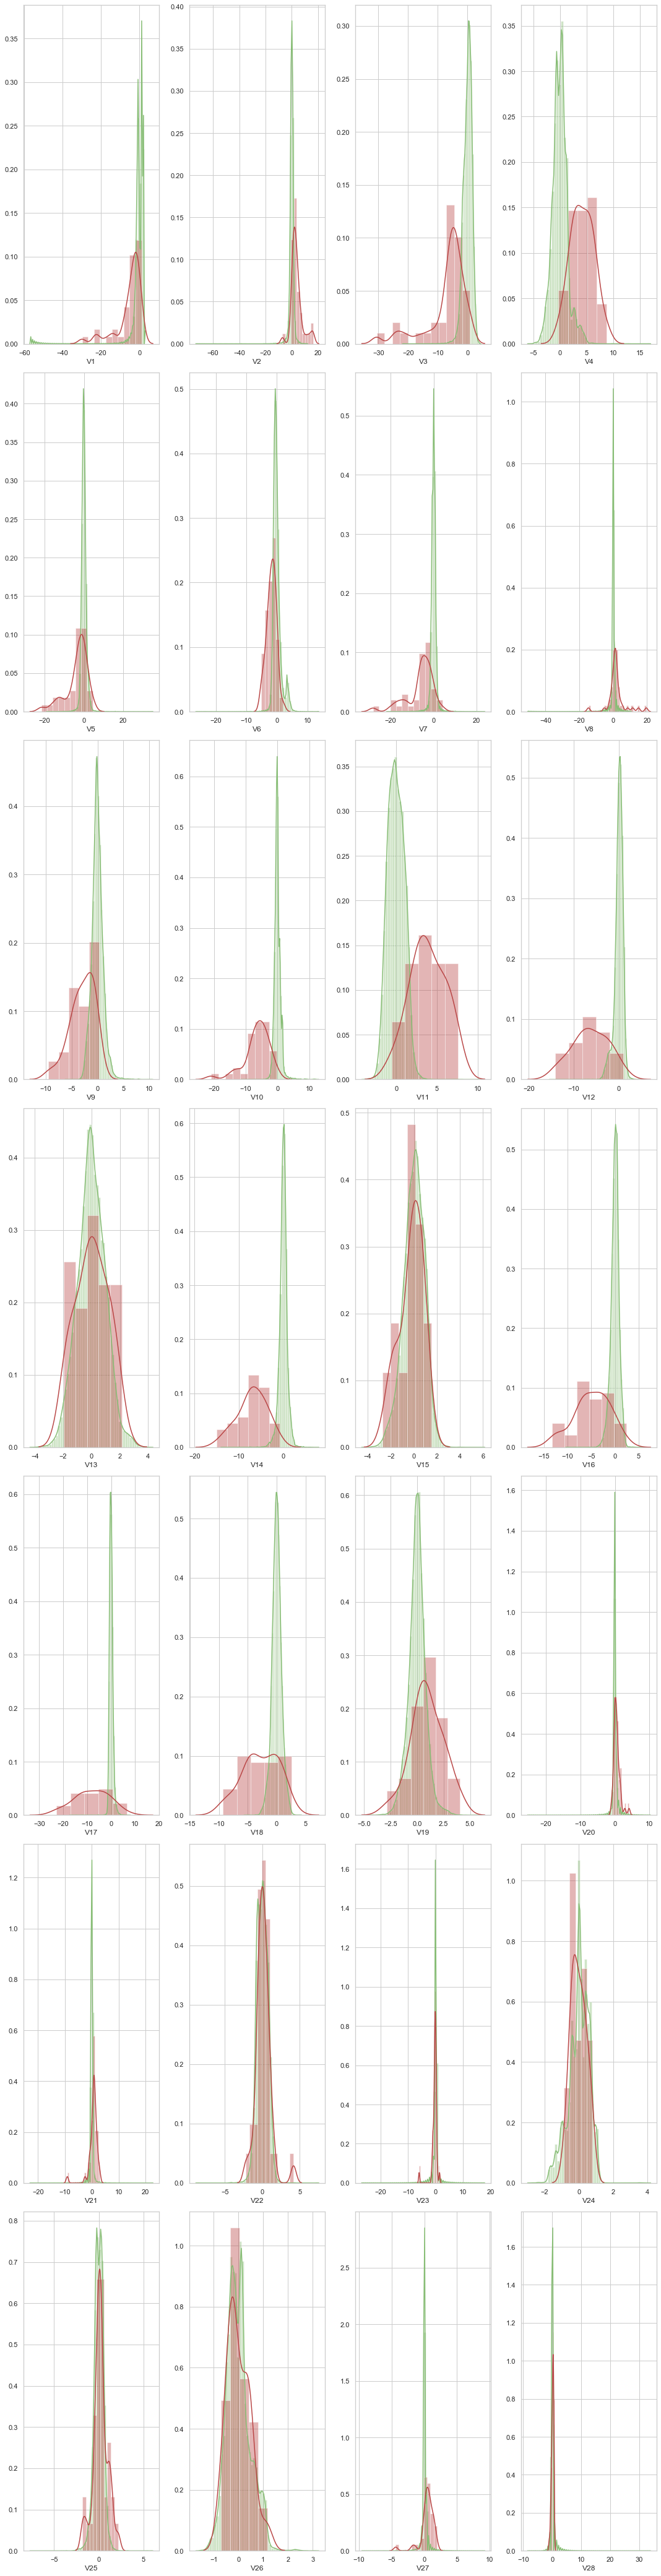

In [29]:
# dsit plot
V = credit_card[[col for col in df.columns if 'V' in col]+['Class']]

f, ax = plt.subplots(ncols = 4, nrows = 7, figsize=(15,2*len(V.columns)))

for i, c in zip(ax.flatten(), V.columns):
    sns.distplot(V[c][V['Class'] == 0],color='#87bd75', ax = i) #Genuine
    sns.distplot(V[c][V['Class'] == 1],color='#b94646', ax = i) #Fraud   
f.tight_layout()

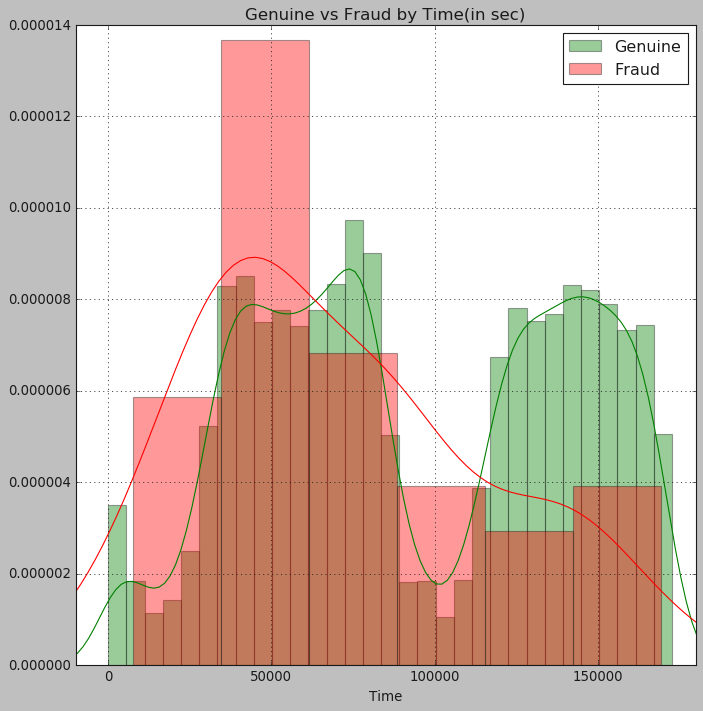

In [30]:

# Genuine vs Fraud by Time


plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(credit_card[credit_card['Class'] == 0]["Time"], color='green') # Genuine - green
sns.distplot(credit_card[credit_card['Class'] == 1]["Time"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Time(in sec)', fontsize=15)
plt.xlim([-10000,180000])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()


From the above graph, we can see that most frauds have happened in the early mornings.


### Genuine vs Fraud by Amount**

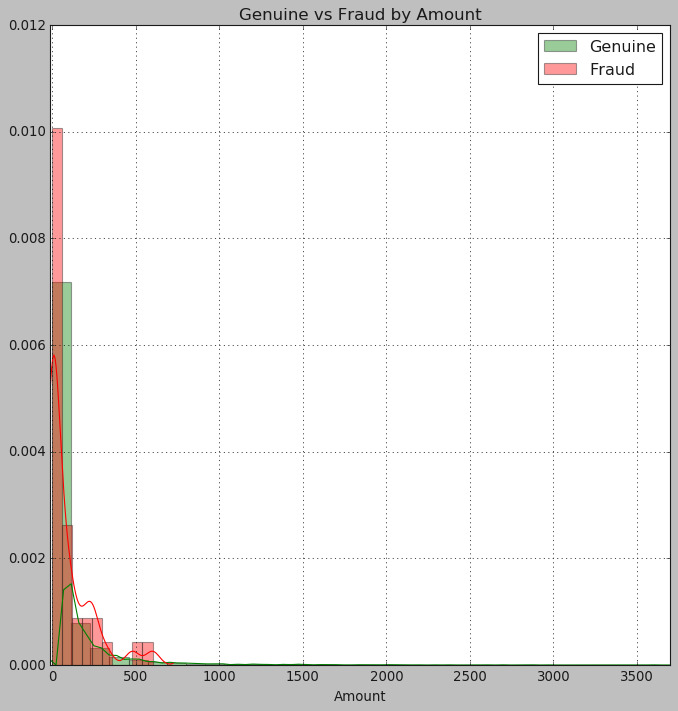

In [31]:
plt.style.use("classic")
plt.figure(figsize=(10,10))

sns.distplot(credit_card[credit_card['Class'] == 0]["Amount"], color='green') # Genuine - green
sns.distplot(credit_card[credit_card['Class'] == 1]["Amount"], color='red') # Fraud - Red

plt.title('Genuine vs Fraud by Amount', fontsize=15)
plt.xlim([-10,3700])
plt.grid(linewidth = 0.7)
plt.legend(['Genuine','Fraud'])
plt.show()

In [32]:
df = credit_card.copy()

### Handling Missing Values

In [33]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


We can see that there is no missing value present in the dataframe.

### Outliers treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe, though we still see outliers available.

### Observe the distribution of our classes

In [34]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.87 %
    Fraudulent : 0.13 %


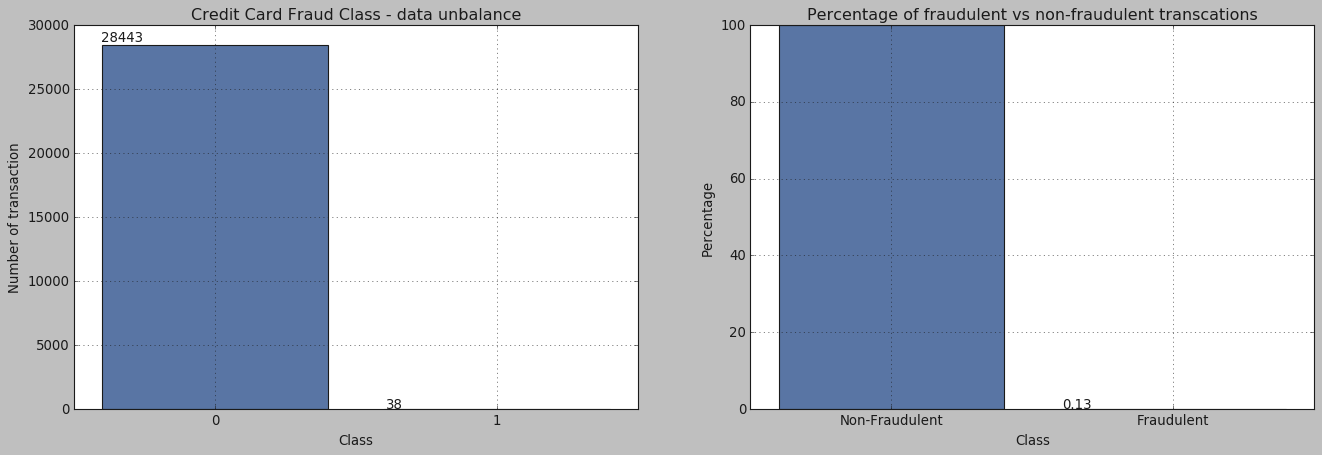

In [35]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

**Observation**

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

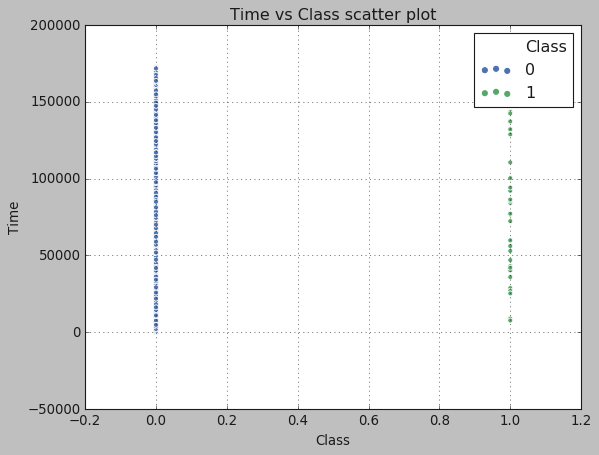

In [36]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot( df["Class"],df["Time"],hue=df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()

**Observation**

There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

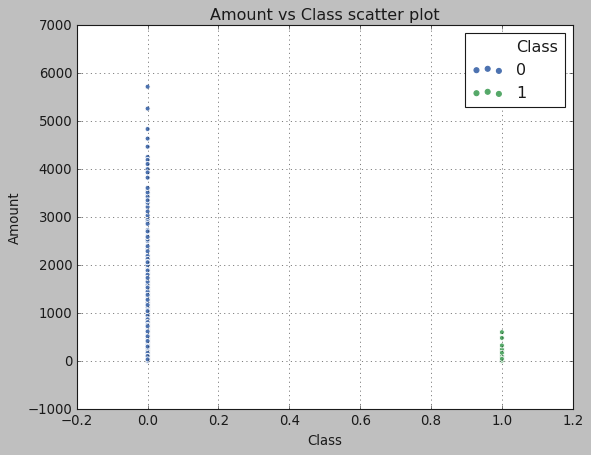

In [37]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Class"],df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

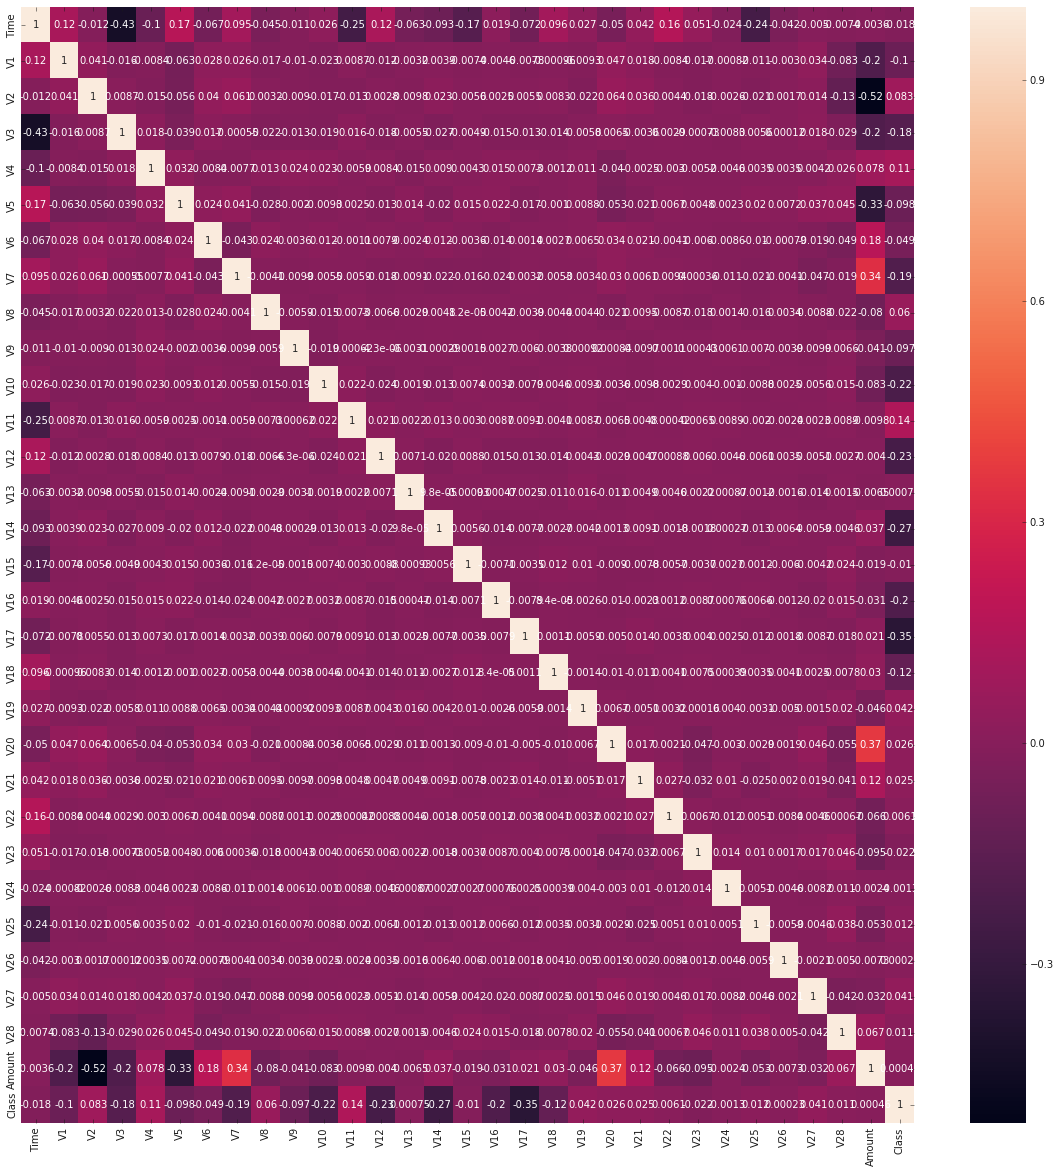

In [38]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

There are no features which there is high correlatation , corr > .75

As we can notice, most of the features are not correlated with each other.

What can generally be done on a massive dataset is a dimension reduction. By picking th emost important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

#### Plotting the distributions of all the features

<Figure size 432x288 with 0 Axes>

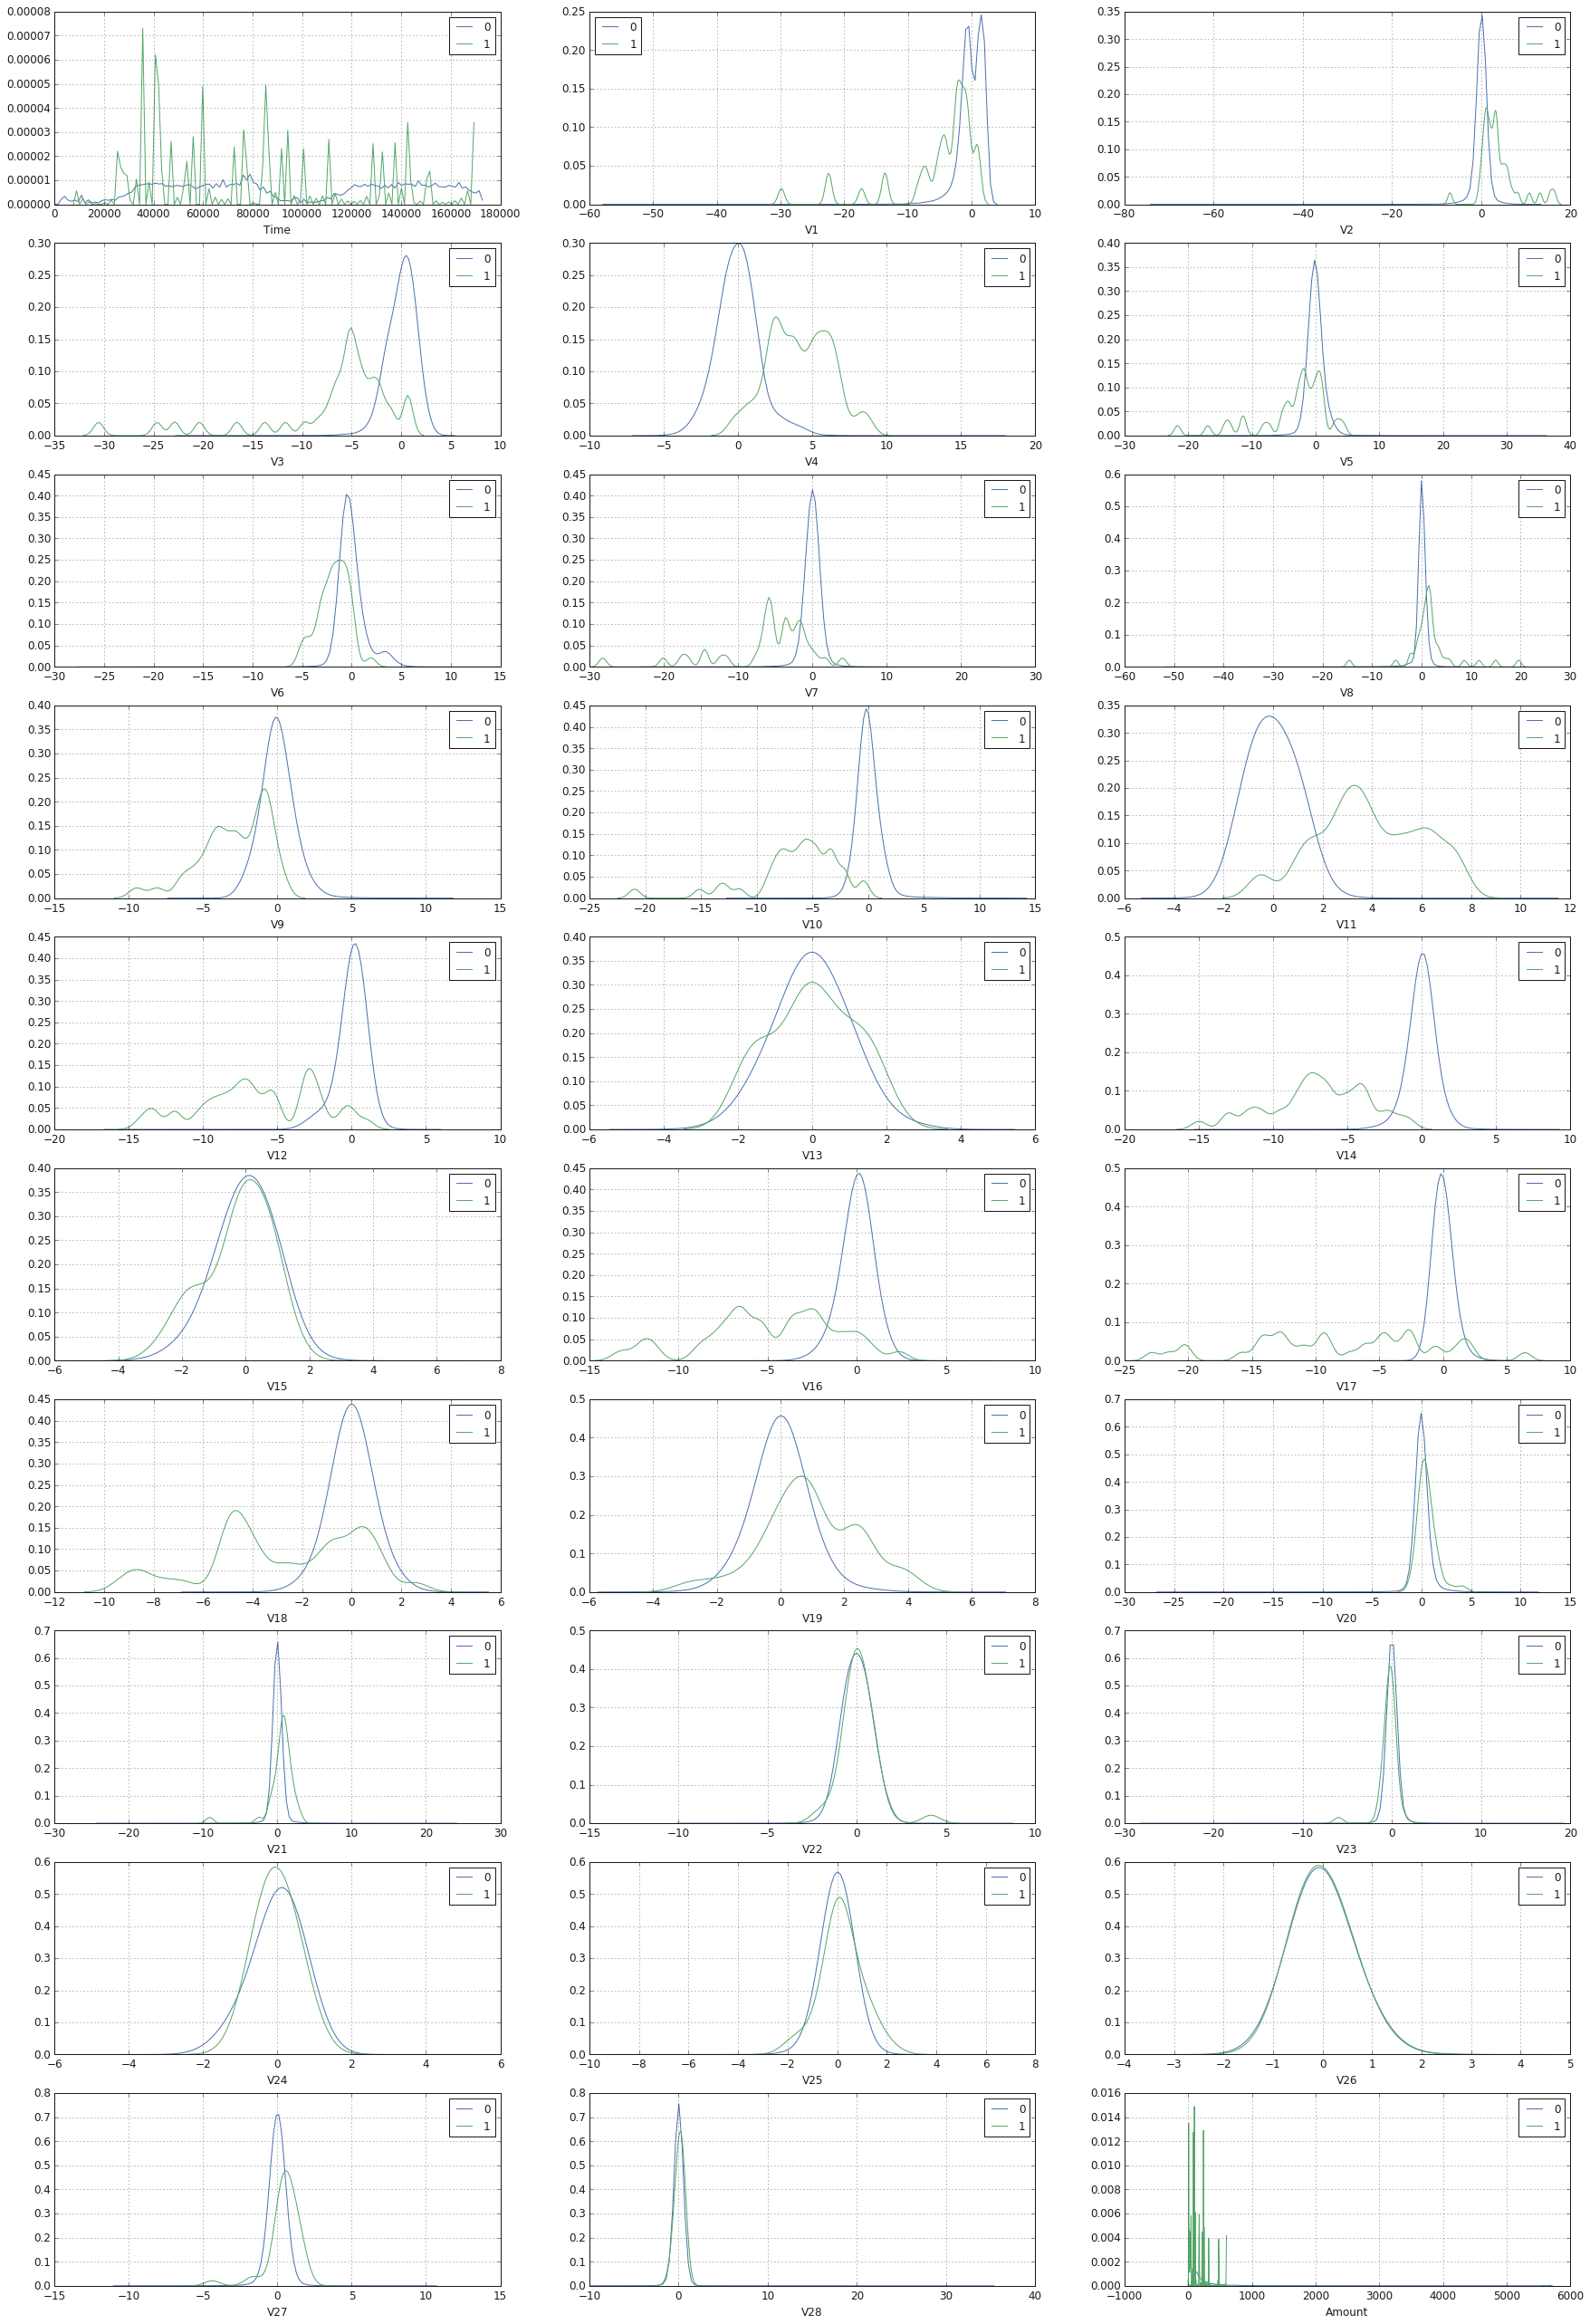

In [39]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

Dropping `Time` column as this feature ,as it is not going to help in the model building.
#### Understanding from Core Banking Business 

In [40]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
113304,-0.962868,0.833963,1.156620,0.131049,-0.428982,0.301553,0.191737,0.721479,-0.260206,-0.586476,...,0.129143,0.477945,0.012980,0.057631,-0.202160,0.377037,0.225998,0.128271,59.99,0
274910,1.700235,-0.582871,-2.129362,0.316635,0.284479,-0.267744,0.060995,0.044719,0.977413,-0.771316,...,-0.149394,-0.657710,0.045469,0.130021,-0.146329,-0.125039,-0.050339,-0.001363,167.24,0
64296,1.316850,-0.767441,0.236228,-0.601789,-0.806152,-0.244863,-0.535812,-0.124819,-0.410252,0.430085,...,-0.097065,-0.318725,-0.137194,-0.425384,0.546865,-0.289350,0.011115,0.021517,75.25,0
92128,1.280963,0.163325,0.281876,0.516694,-0.307418,-0.722034,0.013328,-0.135797,0.184384,-0.047759,...,-0.293890,-0.897306,0.076971,-0.138736,0.257597,0.127070,-0.035647,0.013714,8.98,0
50321,0.822479,-1.739852,-0.907563,-1.970308,0.846875,3.789990,-1.024651,0.967613,2.276663,-1.395844,...,0.090467,0.052655,-0.406557,1.117351,0.713017,0.160052,0.015071,0.054927,250.00,0


### Splitting the data into train & test data

In [41]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((28481,), (28481, 29))

### Dealing with Imbalanced Data

This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud.

To answer this problem we could use the oversampling principle or the undersampling principle The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.


Oversampling

- One way to do oversampling is to replicate the under-represented class tuples until we attain a correct proportion between the class

- However our dataset is very large, and as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data (for those using the undersampling principle if results are really bad just rerun the training dataset definition).

Undersampling

- The dataset is highly imbalanced ! It's a big problem because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To change that, I will proceed to random undersampling.

- The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.

- Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted.

<img src="https://miro.medium.com/max/335/1*YH_vPYQEDIW0JoUYMeLz_A.png"/>

In [42]:
# For undersampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.1)

In [43]:
undersample
X_under, Y_under = undersample.fit_resample(X, y)

In [44]:
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

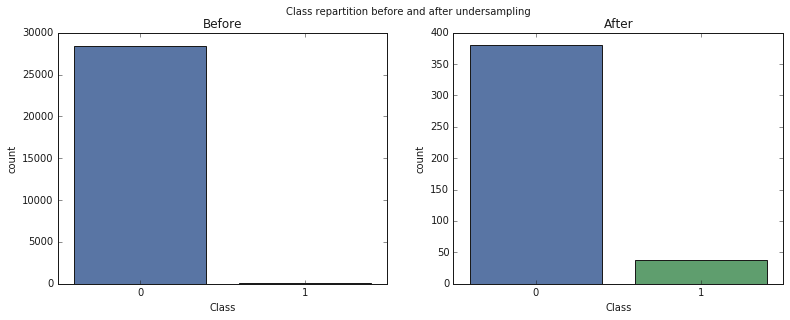

In [45]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [46]:
X.shape,y.shape,X_under.shape,Y_under.shape

((28481, 29), (28481,), (418, 29), (418,))

In [47]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 29), (84, 29), (334,), (84,))

In [48]:
# Class imbalance
y_train.value_counts()/y_train.shape

0    0.922156
1    0.077844
Name: Class, dtype: float64

In [49]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  38
Fraudulent Count for Train data :  26
 Fraudulent Count for Test data :  12


### Feature Scaling using  RobustScaler Scaler
We need to scale `Amount` column.

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.


### Robust Scaler:-

StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.

The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.

RobustScaler uses the interquartile range so that it is robust to outliers. 


Therefore its formula is as follows:
`value = (value – median) / (p75 – p25)`



In [50]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

### Plotting the distribution of a variable to handle skewness

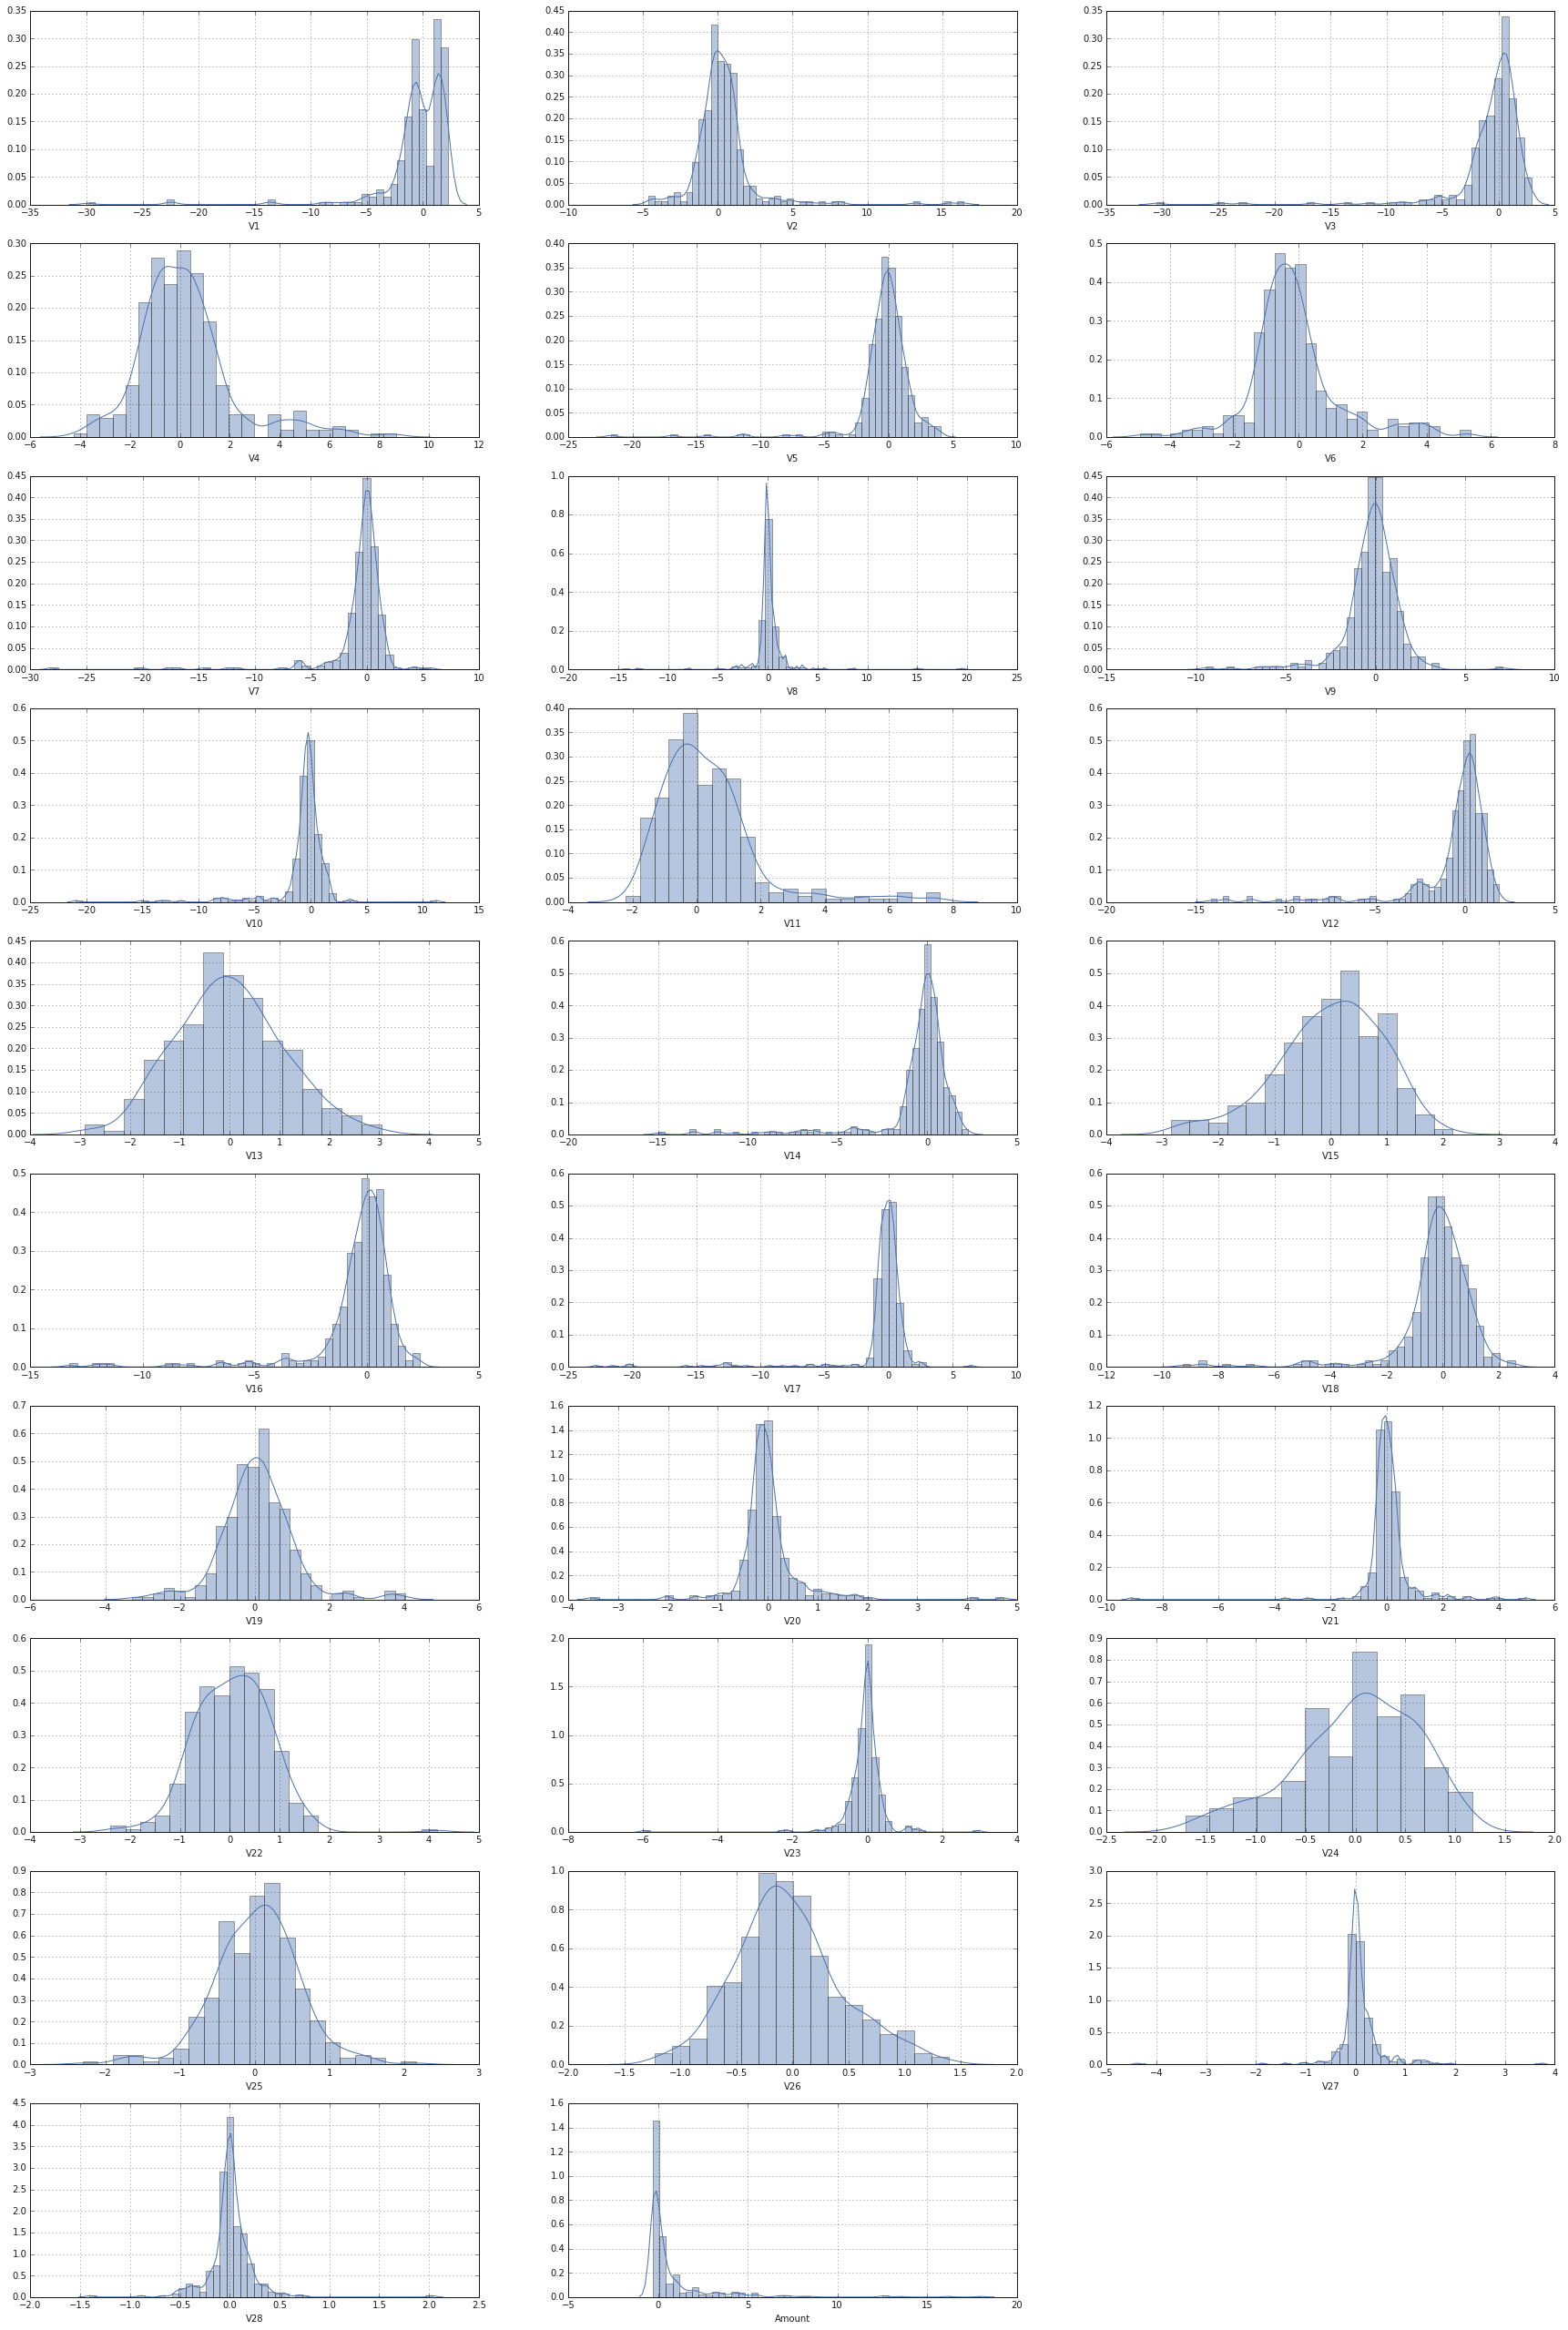

In [51]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [52]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-5.085435
V2,3.569605
V3,-5.027350
V4,1.317430
V5,-4.586780
V6,0.886413
V7,-5.160817
V8,1.835423
V9,-1.558951


In [53]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

### There is skewness present in the distribution of the above features:
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

- in order to ensure that our features are normally distributed we use powertransform

### Powertransform :
Replacing the data with the log, square root, or inverse may help to remove the skew

In [54]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

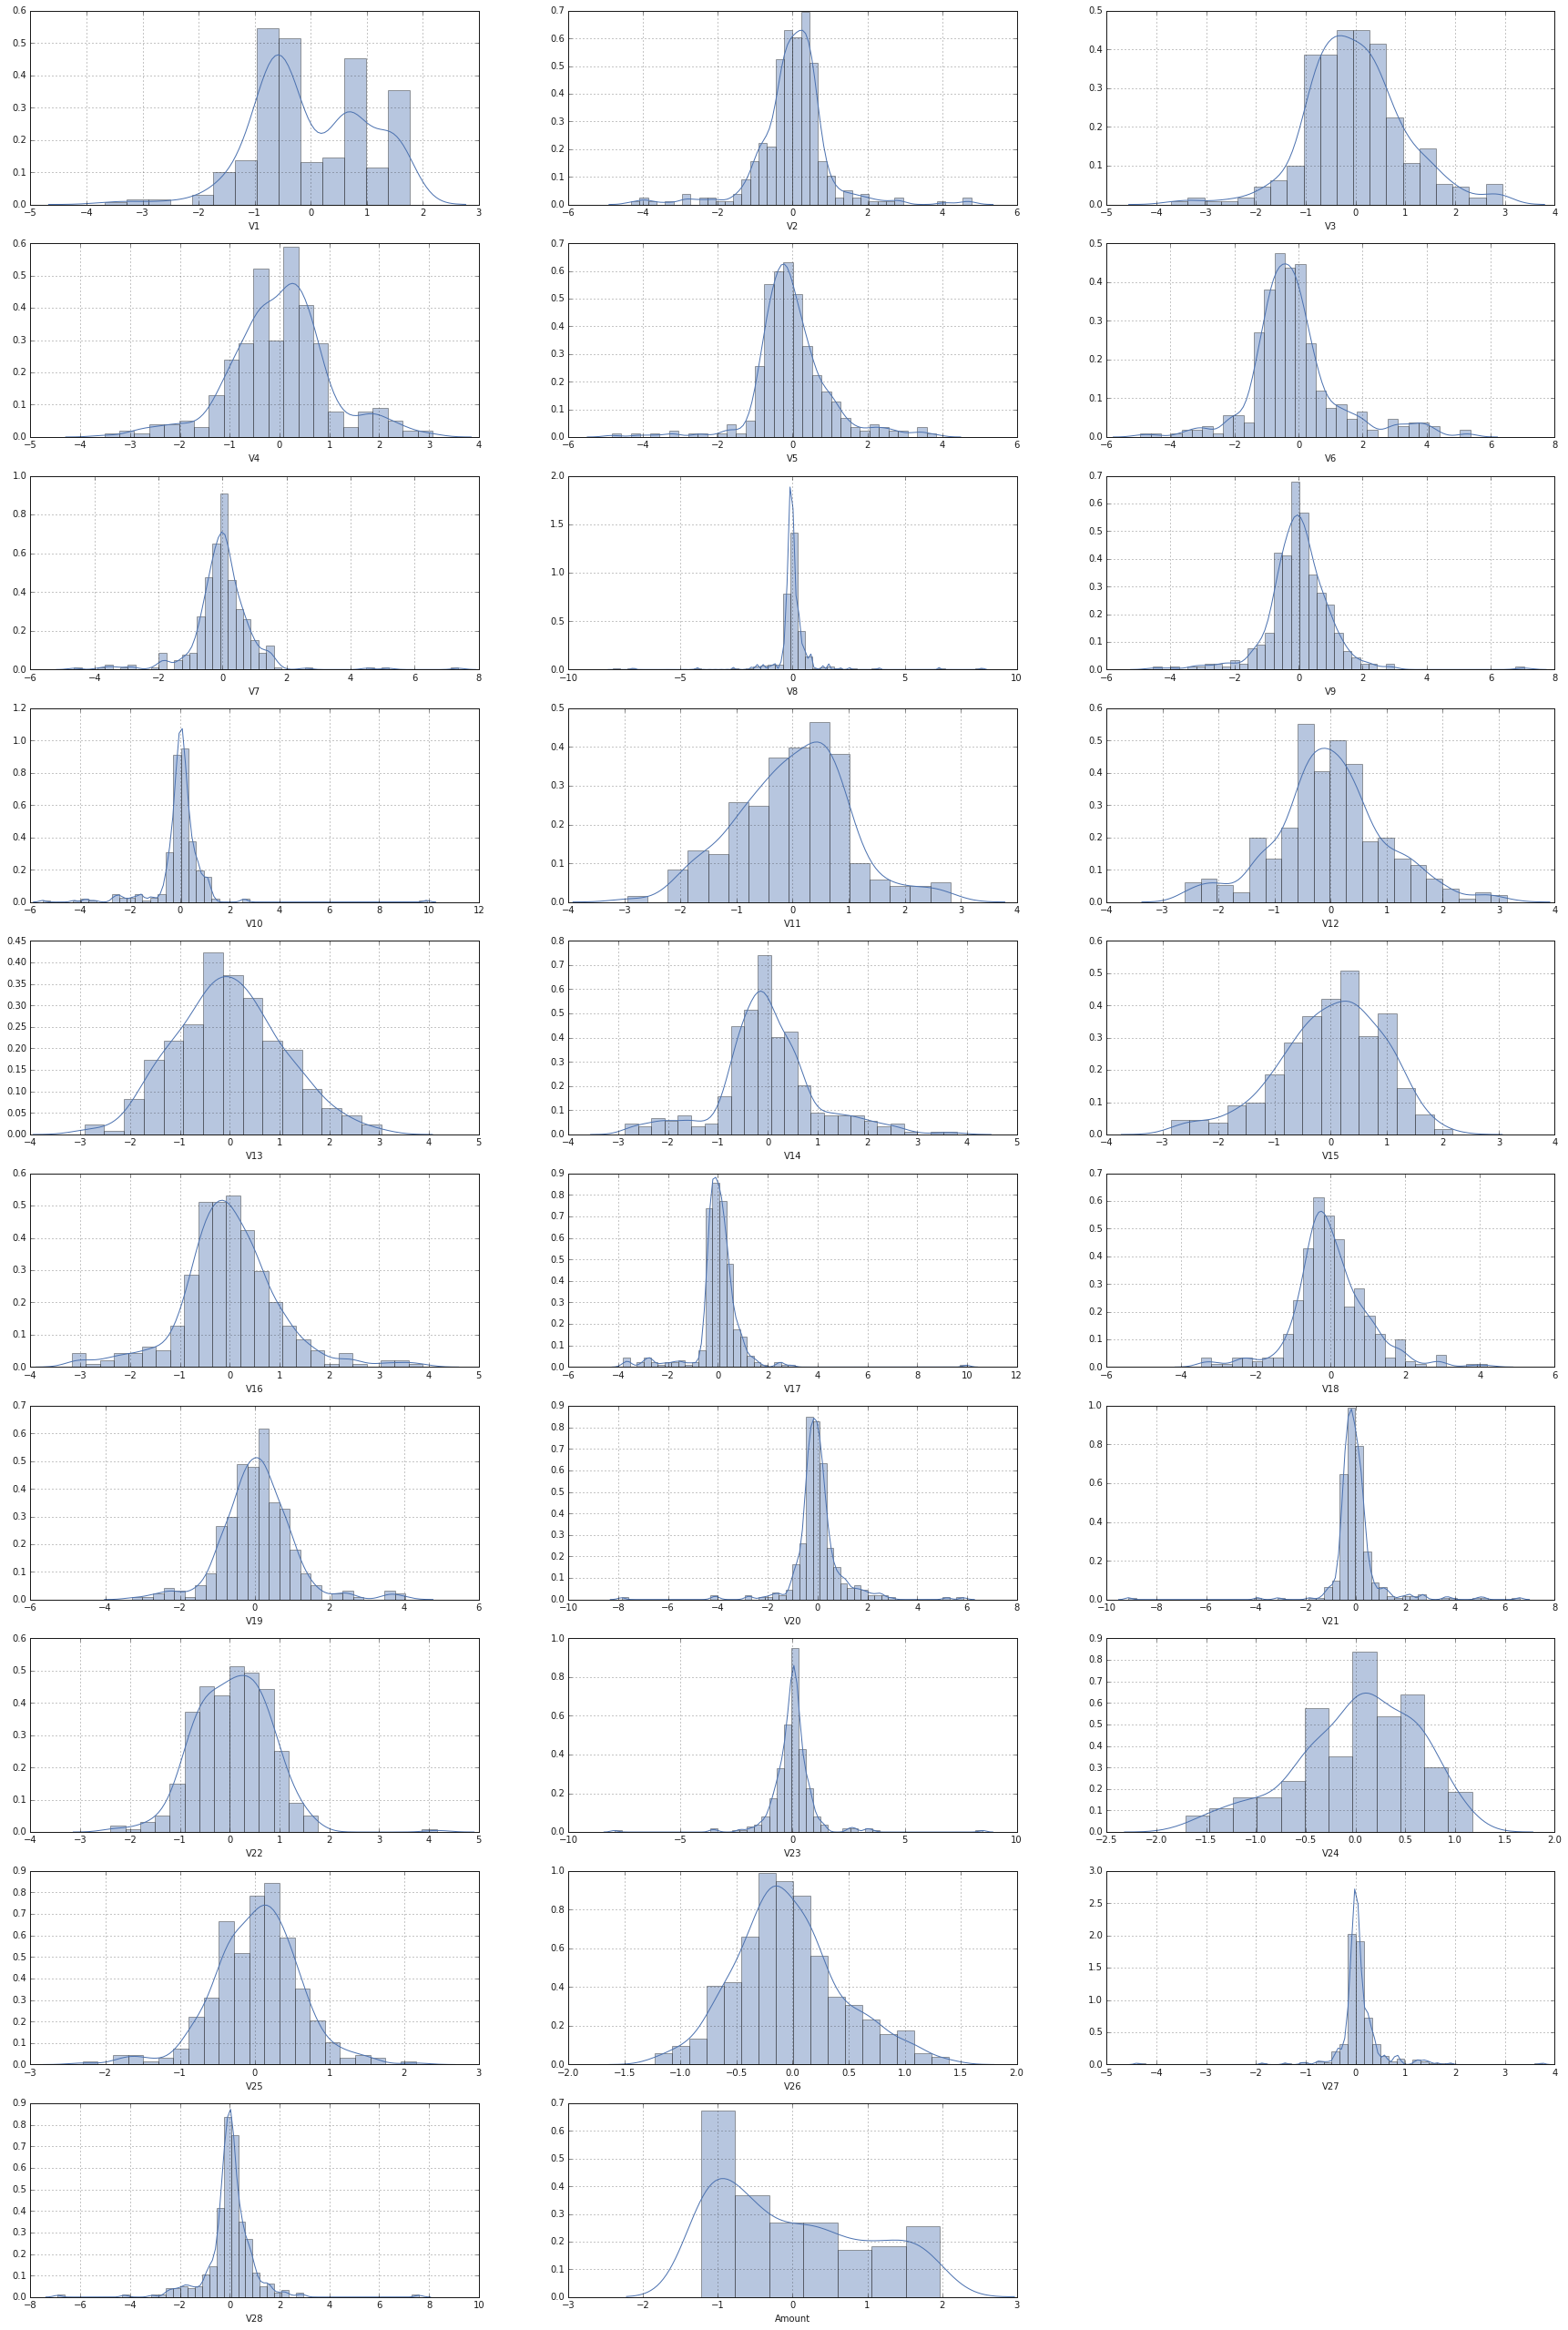

In [55]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

In [56]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


In [57]:
#standard scaling
X_train['std_Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape (-1,1))
X_test['std_Amount'] = scaler.transform(X_test['Amount'].values.reshape (-1,1))

#removing Amount
X_train = X_train.drop("Amount", axis=1)
X_test = X_test.drop("Amount", axis=1)

## Model Building 
We are going to build models on below mentioned algorithms and we will compare for the best model. 

Working with below models:
    - Logistic Regression
    - SVM
    - RandomForest
    

#### Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [59]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

## 1.Logistic regression

In [60]:
#train the model
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train, y_train)


In [61]:
#predictions
y_pred_logit = model1.predict(X_test) 

In [62]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))


Accuracy Logit: 0.9642857142857143
Precision Logit: 1.0
Recall Logit: 0.75
F1 Score Logit: 0.8571428571428571


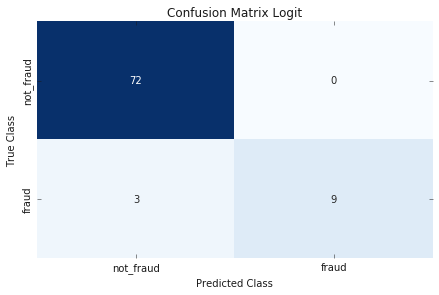

In [63]:
#print CM
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [64]:
#AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9930555555555556


## 2. Support Vector Machine


In [65]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [66]:
#predictions
y_pred_svm = model2.predict(X_test)

In [67]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9642857142857143
Precision SVM: 1.0
Recall SVM: 0.75
F1 Score SVM: 0.8571428571428571


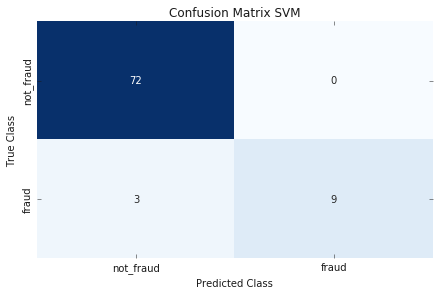

In [68]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [69]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9849537037037037


## 3. Random Forest

In [70]:
#train the model
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [71]:
#predictions
y_pred_rf = model3.predict(X_test)

In [72]:
#scores
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9761904761904762
Precision RF: 1.0
Recall RF: 0.8333333333333334
F1 Score RF: 0.9090909090909091


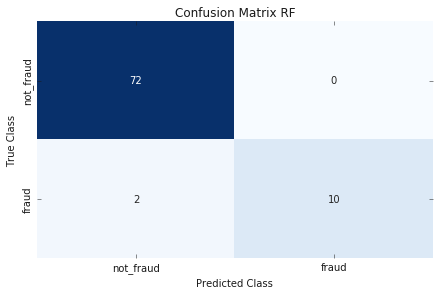

In [73]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [74]:
#AUC
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9965277777777778
